In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df= pd.read_csv("SalesData.csv")

In [7]:
df.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [ ]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)

sales1graph=sales1.plot.bar(figsize=(12,6))

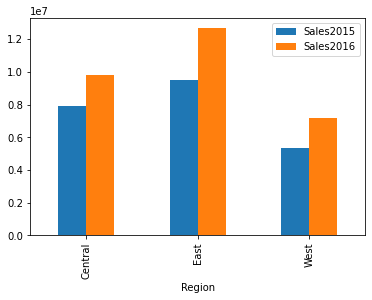

In [8]:
(df.groupby(["Region"])[["Sales2015","Sales2016"]].sum()).plot(kind="bar")
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

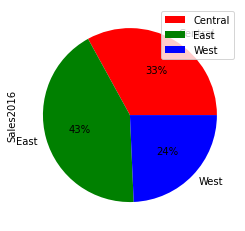

In [9]:
(df.groupby(["Region"])[["Sales2016"]].sum()).plot(kind='pie',
            colors=['r', 'g', 'b'],                                    
            autopct='%1.0f%%',
            fontsize=10, 
            subplots='true')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [ ]:
sales3 = sales.groupby([]).aggregate({})

sales3graph=sales3.plot.bar(figsize=(18,6))

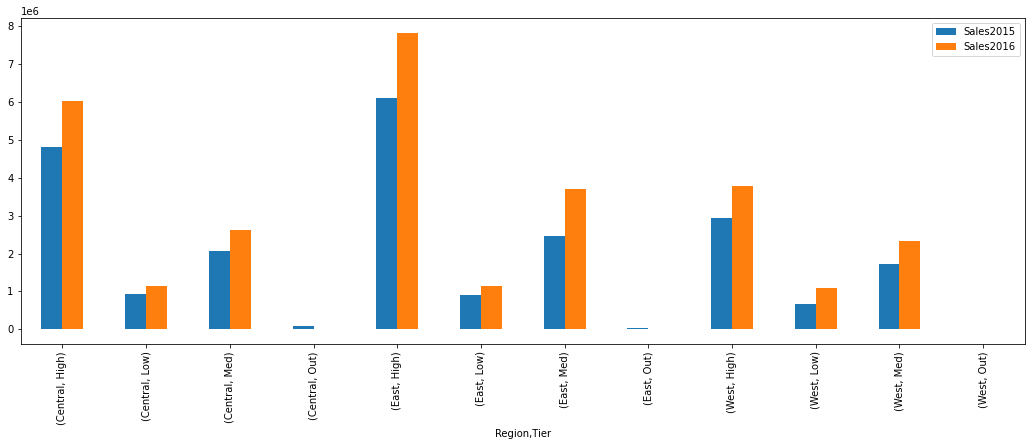

In [13]:
m1=df.groupby(["Region","Tier"])[["Sales2015","Sales2016"]].sum()
m1.plot.bar(figsize=(18,6))
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

<ipython-input-14-aa3b17b039a3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby("State")["TargetAchevied2015","TargetAchevied2016"].sum().plot.bar()


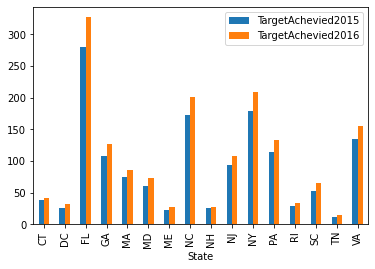

In [14]:
df1=df[df["Region"]=="East"]
df1.groupby("State")["TargetAchevied2015","TargetAchevied2016"].sum().plot.bar()
plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

<ipython-input-18-13f674d33cea>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby("Division")["Units2015","Units2016"].sum().plot.bar(figsize=(15,6))


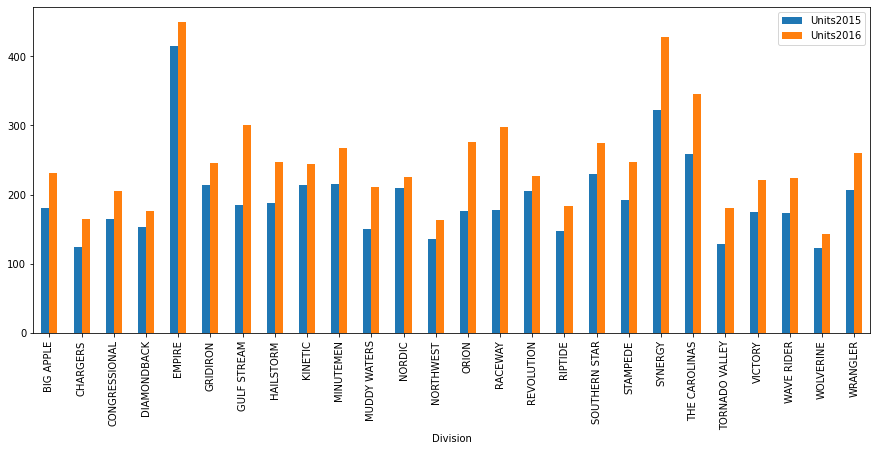

In [18]:
df2=df[df["Tier"]=="High"]
df2.groupby("Division")["Units2015","Units2016"].sum().plot.bar(figsize=(15,6))
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [45]:
df= pd.read_csv("SalesData.csv")

In [46]:
df.head()
df.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [47]:
df['Month']=pd.to_datetime(df['Month'],format="%b")

In [48]:
qw=lambda x:pd.Timestamp.strftime(x,format="%m")

In [49]:
df['Month']=df['Month'].apply(qw)

In [53]:
df['Month']=pd.to_numeric(df['Month'])

In [54]:
df.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                   int64
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [55]:
df["qtr"]=pd.cut(df['Month'],bins=[1,3,6,9,12],labels=["q1","q2","q3","q4"],include_lowest=True)

In [56]:
df.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,8,0.00,13208.52,0.0,4.0,0.70,1.53,q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,10,10500.78,23114.91,3.0,7.0,0.84,1.31,q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,6,0.00,6627.00,0.0,3.0,1.15,1.29,q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,3,19881.00,13254.00,9.0,6.0,1.33,1.17,q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,9,3684.48,0.00,1.0,0.0,1.02,1.53,q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


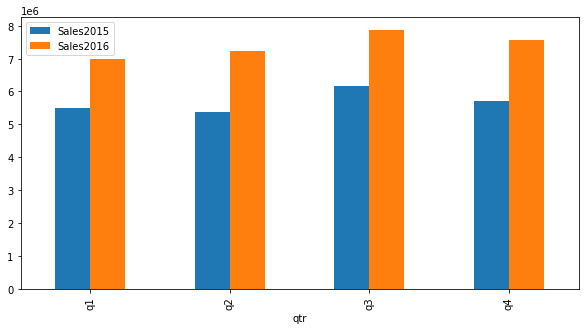

In [57]:
df.groupby("qtr")[["Sales2015","Sales2016"]].sum().plot.bar(figsize=(10,5))
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [58]:
p=df[df["Tier"]!="Out"]
p.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,8,0.00,13208.52,0.0,4.0,0.70,1.53,q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,10,10500.78,23114.91,3.0,7.0,0.84,1.31,q4


In [66]:
p1=p.groupby(["qtr","Tier"])[["Sales2016"]].sum().round(decimals=0)
p1.stack()
p1

Sales2016
qtr Tier           
q1  High  3867719.0
    Low    948833.0
    Med   2181402.0
q2  High  4130953.0
    Low    890595.0
    Med   2215814.0
q3  High  4872559.0
    Low    795178.0
    Med   2197058.0
q4  High  4740002.0
    Low    742659.0
    Med   2085207.0

In [67]:
p1=p1.unstack(level=0)
p1

Sales2016                                 
qtr          q1         q2         q3         q4
Tier                                            
High  3867719.0  4130953.0  4872559.0  4740002.0
Low    948833.0   890595.0   795178.0   742659.0
Med   2181402.0  2215814.0  2197058.0  2085207.0

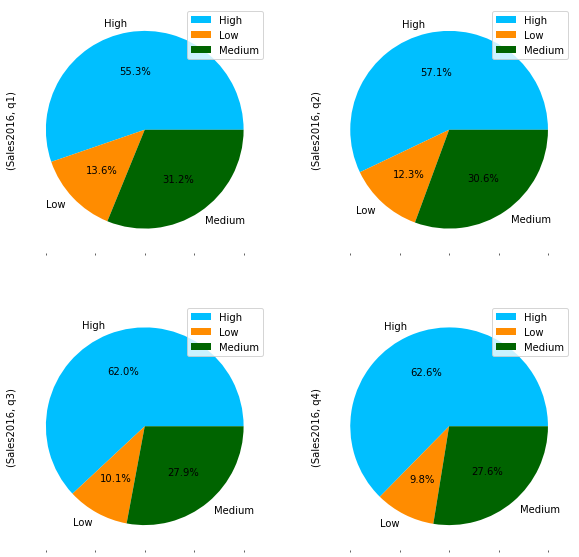

In [71]:
p1.plot(kind='pie', 
            autopct='%1.1f%%',
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()